In [1]:
import sympy as sym
from sympy import Symbol, symbols, exp, sin, cos, series, Function, init_printing
from sympy import Derivative, diff, Eq, simplify, collect, expand, pi, integrate
init_printing()

Рассмотрите уравнение осциллятора $\ddot{x}+\Pi^{\prime}(x)=\beta \dot{x}^2$ 
в поле с потенциалом $\Pi(x)$ при наличии квадратичной диссипация с начальными условиями 
$x(0)=x_0+\varepsilon, \dot{x}(0)=0$, где $x_0$ — положение равновесия.

Методом осреднения получите поправку первого порядка к частоте
колебаний вблизи положения равновесия для потенциалов:

4) Морса $\Pi(x)=(1 - e^{-\alpha x})^2$, $\alpha>0$

In [2]:
t=Symbol('t',real = True)
alpha = Symbol('alpha',real = True)
alpha1 = Symbol('alpha1',real = True)
beta = Symbol('beta',real = True)

x=Function('x')
r=Symbol("r",real=True)
phi=Symbol("varphi",real=True)
X = Symbol('x', real= True)

#потенциал Морса
potential = (1 - exp(-alpha*x(t)))**2
potential

In [3]:
sym.solve(sym.diff(potential, x(t)), x(t))

начальные условия $x(0)=\varepsilon, \dot{x}(0)=0$, где $x_0 = 0$ — положение равновесия.

In [4]:
potential_x0 = sym.series(potential.subs(x(t), X), X, x0=0, n=4).removeO().subs(X, x(t))

# Возмущение в уравнении
f=beta*Derivative(x(t), t)**2 + 3*alpha**3*x(t)**2

potential_x0, f

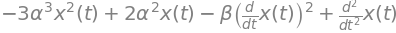

In [5]:
eq = Derivative(x(t), t, t) + sym.diff(potential_x0, x(t)) - beta * Derivative(x(t), t)**2
eq

Приведем данное уравнение к виду: 
$\ddot x+\omega_0^2x=\varepsilon f\left(x,\dot x\right)$

чтобы с помощью замены : $x=r\cos\varphi,\quad \dot x=-\omega_0r\sin\varphi$, перейти у системе

$\dot r=-\frac\varepsilon{\omega_0} f \sin\varphi,\\
\dot\varphi= \omega_0-\frac\varepsilon{\omega_0} \frac fr\cos\varphi.$

для это сделаем замену $\sqrt{2} \alpha = \alpha_1$

In [6]:
eq = eq.subs([(2 * alpha**2, alpha1**2), (alpha**3, alpha1**3/(2*sym.sqrt(2)))])
f = f.subs(alpha**3, alpha1**3/(2*sym.sqrt(2)))
# Подстановка по формуле (2)
Subsphase={x(t):r*cos(phi),Derivative(x(t),t):-r*alpha1*sin(phi)}
f_rphi = f.subs(Subsphase)
Eq_r=-beta/alpha1*f_rphi*sin(phi)
Eq_phi=alpha1 - beta/alpha1*cos(phi)*f_rphi/r
Eq_r,Eq_phi

In [7]:
# Вычисляем усреднение для r и phi
integrate(1/(2*pi)*Eq_r.coeff(beta,1),(phi,0,2*pi)),\
integrate(1/(2*pi)*Eq_phi.coeff(beta,1),(phi,0,2*pi))

Первое усреднение даёт нулевые поправки, поэтому будем искать поправки следующих порядков, используя обобщённый метод усреднения.Значит следует искать поправки следующих порядков

In [8]:
Nexpand=3
a=Function("a")
A=Symbol("a")
psi=Function("psi")
Psi=Symbol("psi")
alst=[Function(f'a{i}') for i in range(1,Nexpand)]
psilst=[Function(f'psi{i}') for i in range(1,Nexpand)]
Alst=[Function(f'A{i}') for i in range(1,Nexpand)]
Blst=[Function(f'B{i}') for i in range(1,Nexpand)]

In [9]:
# Определяем подстановки
Subs_r = a(t) + sum([beta**i*alst[i-1](a(t),psi(t)) for i in range(1,Nexpand)])
Subs_phi=psi(t)+sum([beta**i*psilst[i-1](a(t),psi(t)) for i in range(1,Nexpand)])
Subs_dota=sum([beta**i*Alst[i-1](a(t)) for i in range(1,Nexpand)])
Subs_dotpsi=alpha1+sum([beta**i*Blst[i-1](a(t)) for i in range(1,Nexpand)])

In [10]:
# Получаем разложение левых частей уравнений
Subs_derivative={Derivative(a(t),t):Subs_dota,
                 Derivative(psi(t),t):Subs_dotpsi}

lhs_dotr=collect(series(Subs_r.diff(t).subs(Subs_derivative).expand(),beta,0,Nexpand).removeO(),beta)
lhs_dotphi=collect(series(Subs_phi.diff(t).subs(Subs_derivative).expand(),beta,0,Nexpand).removeO(),beta)

In [11]:
# Получаем разложение правых частей уравнений
Subs_rphi={r:Subs_r,phi:Subs_phi}
rhs_dotr=collect(series(Eq_r.subs(Subs_rphi),beta,0,Nexpand).removeO(),beta)
rhs_dotphi=collect(series(Eq_phi.subs(Subs_rphi),beta,0,Nexpand).removeO(),beta)

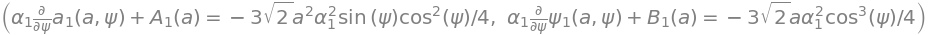

In [12]:
# Уравнения первого порядка
Subs_apsi={a(t):A,psi(t):Psi}
FO_r=Eq(lhs_dotr.coeff(beta,1),rhs_dotr.coeff(beta,1)).subs(Subs_apsi)
FO_phi=Eq(lhs_dotphi.coeff(beta,1),rhs_dotphi.coeff(beta,1)).subs(Subs_apsi)
FO_r,FO_phi

In [13]:
SubsAB=dict(zip([Alst[0](A),Blst[0](A)],\
                 [integrate(FO_r.rhs,([Psi,0,2*pi]))/(2*pi),\
                  integrate(FO_phi.rhs,([Psi,0,2*pi]))/(2*pi)]))
SubsAB

In [14]:
Subsapsi=dict(zip([alst[0](A,Psi),psilst[0](A,Psi)],\
                   [integrate(FO_r.rhs/alpha1,Psi).trigsimp(),\
                    integrate(FO_phi.rhs/alpha1,Psi).trigsimp()]))
Subsapsi

In [15]:
# Уравнения второго порядка
SO_r=Eq(lhs_dotr.coeff(beta,2).subs(Subs_apsi).subs(SubsAB),
        rhs_dotr.coeff(beta,2).subs(Subs_apsi).subs(Subsapsi).trigsimp())

SO_phi=Eq(lhs_dotphi.coeff(beta,2).subs(Subs_apsi).subs(SubsAB),
          rhs_dotphi.coeff(beta,2).subs(Subs_apsi).subs(Subsapsi).trigsimp())
SO_r,SO_phi

In [16]:
SubsAB.update(zip([Alst[1](A),Blst[1](A)],\
                 [integrate(SO_r.rhs,([Psi,0,2*pi]))/(2*pi),\
                  simplify(integrate(SO_phi.rhs,([Psi,0,2*pi]))/(2*pi))]))
SubsAB

In [17]:
Subsapsi.update(zip([alst[1](A,Psi),psilst[1](A,Psi)],\
                   [integrate(SO_r.rhs/alpha1,Psi).trigsimp(),\
                    integrate(SO_phi.rhs/alpha1,Psi).trigsimp()]))
Subsapsi